In [1]:
#Importing packages

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import time

<AxesSubplot:xlabel='Time'>

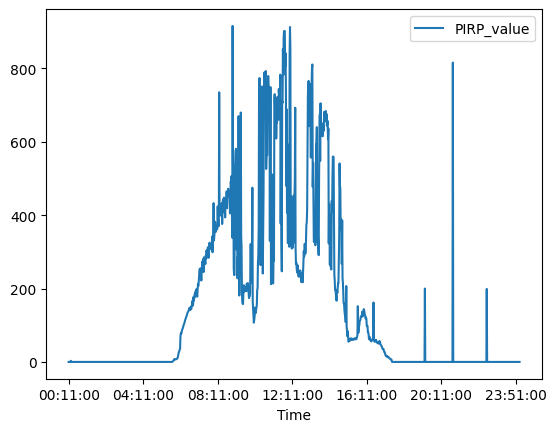

In [87]:
#plotting a particular day to make sure all is going right...
csv_dir=os.path.join("preprocess_csv_files_new","2022-09-21.csv")
data=pd.read_csv(csv_dir,delimiter=';', error_bad_lines=False)
data.plot(x="Time",y="PIRP_value")

In [39]:
lab_day=len(os.listdir("preprocess_csv_files_new"))
img_day=len(os.listdir("skycamera_images"))
print(f"the days in preprocess_csv_files_new folder are: {lab_day} and the days in skycamera_images folder are: {img_day}")

the days in preprocess_csv_files_new folder are: 441 and the days in skycamera_images folder are: 441


In [63]:
#We have to eliminate and delete labels that do not have corresponding photos
#Which  means, each minute that do not have its corresponding image or vis vers ca will be eliminated
data.set_index('Time', inplace=True)

In [75]:
#Trying to delete a particulat time data so if it works, i can loop it over all with imposing some conditions...
data.drop("00-15",inplace=True)
data.head()


d:\Stagiaire_2023_Saad\Working space\saadenv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PIRP_value,Category
Time,,
00-11,0,class 0
00-12,0,class 0
00-16,0,class 0
00-17,3,class 0
00-18,0,class 0


# 1- **Assuring correspondance applied to a particular exemple where the labels are csv files**

In [12]:
s=data["Time"]
#print(s)
arr_csv=s.values
print(arr_csv[3])
def transform_to_time_like_img(L):
    #transforming time to the same syntax as images like for exemple 06-15
    for i in range(len(L)):
        L[i]=L[i][:2]+"-"+L[i][3:5]
    return L

def remove_ext(L):
    #Removing the .png extension from images names
    for i in range(len(L)):
        L[i]=L[i][0:5]
    return L

def put_back_ext(L,ext):
    #Putting back the exetension
    for i in range(len(L)):
        L[i]=L[i][0:5]+ext
    return L

print(transform_to_time_like_img(arr_csv))

#Testing on particular exemples
arr_img=os.listdir(os.path.join("skycamera_images","2022-09-21"))
print(remove_ext(arr_img))

print(len(arr_img),len(arr_csv))

#Using sets so we can easily keep the intersection elements of the two groups
set_img=set(arr_img)
set_csv=set(arr_csv)
print("len set image", len(set_img))
#print(len(set_img.intersection(set_csv)))
inter=set_img.intersection(set_csv)
print(len(inter))
print(len(set_csv))
set_csv=set_csv-inter
set_img=set_img-inter


print("len set csv",len(set_csv)+605)
print(set_csv)
print("len set image", len(set_img)+605)




03-19
['03-16' '03-17' '03-18' '03-19' '03-20' '03-21' '03-22' '03-23' '03-24'
 '03-25' '03-26' '03-27' '03-28' '03-29' '03-30' '03-31' '03-32' '03-33'
 '03-34' '03-35' '03-36' '03-37' '03-38' '03-39' '03-40' '03-41' '03-42'
 '03-43' '03-44' '03-45' '03-46' '03-47' '03-48' '03-49' '03-50' '03-51'
 '03-52' '03-53' '03-54' '03-55' '03-56' '03-57' '03-58' '03-59' '04-00'
 '04-11' '04-12' '04-13' '04-14' '04-15' '04-16' '04-17' '04-18' '04-19'
 '04-20' '04-21' '04-22' '04-23' '04-24' '04-25' '04-26' '04-27' '04-28'
 '04-29' '04-30' '04-31' '04-32' '04-33' '04-34' '04-35' '04-36' '04-37'
 '04-38' '04-39' '04-40' '04-41' '04-42' '04-43' '04-44' '04-45' '04-46'
 '04-47' '04-48' '04-49' '04-50' '04-51' '04-52' '04-53' '04-54' '04-55'
 '04-56' '04-57' '04-58' '04-59' '05-00' '05-11' '05-12' '05-13' '05-14'
 '05-15' '05-16' '05-17' '05-18' '05-19' '05-20' '05-21' '05-22' '05-23'
 '05-24' '05-25' '05-26' '05-27' '05-28' '05-29' '05-30' '05-31' '05-32'
 '05-33' '05-34' '05-35' '05-36' '05-37' '05-

In [13]:
def come_back_to_original_time(L):
    for i in range(len(L)):
        L[i]=L[i][0:2]+":"+L[i][3:]+":00"
    return L

L=['18-35']
#Used to have the original syntax of the corresponding time
come_back_to_original_time(L)


po


['18:35:00']

# 2- **Assuring correspondance applied to all data, img_dir folder and csv_dir that contains csv files and not txt ones**

In [ ]:
#Making sure before that we have the same .png extension everywhere
for file in os.listdir("skycamera_images - Copie"):
    for e in os.listdir(os.path.join("DATA_copie",file)):
        if e[5:]!=".jpg":
            print(file,e)

In [4]:
img_dir="skycamera_images - Copie" 
#Contains subfolders of days that contains minutes-wise images like 06-15.png, 06-16.png...
csv_dir="preprocess_csv_files_new - Copie"
#Contains preprocessed csv files that are named like 2021-06-25, 2021-06-26...

def remove_ext(L):
    for i in range(len(L)):
        L[i]=L[i][0:5]
    return L

def transform_to_time_like_img(L):
    for i in range(len(L)):
        L[i]=L[i][:2]+"-"+L[i][3:5]
    return L

def come_back_to_original_time(L):
    for i in range(len(L)):
        L[i]=L[i][0:2]+":"+L[i][3:]+":00"
    return L

"""
def put_back_ext(L,ext):
    for i in range(len(L)):
        L[i]=L[i][0:5]+ext
    return L
"""

def match_img_labels(img_dir,csv_dir):

    #Looping over the days after checking (see in the end) that the two folders have the same days
    for sub_folder in os.listdir(img_dir):

        img_arr=os.listdir(os.path.join(img_dir,sub_folder))
        #Removing extension for all the images of that particular day
        img_arr=remove_ext(img_arr)
    
        #Reading the csv file of the same particular day
        data=pd.read_csv(os.path.join(csv_dir,sub_folder+".csv"),delimiter=';', error_bad_lines=False)
        
        s=data["Time"].copy() #This .copy() is very imported, without it, all is gone..
        arr_csv=s.values
        #Setting time as index so we can facilate the deleting operation
        data.set_index('Time', inplace=True)
    
        #Transforming time syntax from like 10:05:00 to 10-05
        arr_csv=transform_to_time_like_img(arr_csv)
    
        #it's an early stage of preprocessing because with transforming to sets We delete occurences
        set_img=set(img_arr)
        set_csv=set(arr_csv)
    
        inter=set_csv.intersection(set_img)
    
        set_csv=set_csv-inter
        set_img=set_img-inter
        #Here set_csv and set_img are becoming the elements that we need to delete

        #Come back to the original time syntax
        arr_csv=come_back_to_original_time(list(set_csv))

        for time in arr_csv:
            if arr_csv==[]:
                break
            #Delete all the irradiance data that do not have corresponding images
            data.drop(time,inplace=True)
    
        #Saving the modified csv file
        data.to_csv(os.path.join(csv_dir,sub_folder+".csv"),sep=';',index=True)

        for img in set_img:
            if set_img=={}:
                break
            #Remove all the images that do not have corresponding irradiance values
            os.remove(os.path.join(img_dir,sub_folder,img+".jpg"))

match_img_labels(img_dir,csv_dir)


# 3- **Assuring correspondance applied to a particular exemple where the labels are txt files**

In [34]:
def delete_label_et_img():
    #for folder_day in os.listdir("DATA_copie"):
    folder_day="2021-11-17"

    labels=os.listdir(os.path.join("labels",folder_day))
    images=os.listdir(os.path.join("DATA_copie",folder_day))
    print("10:00 f images folder", "10-00.jpg" in images)
    print("10:00 f labels folder", "10-00.txt" in images)


    labels=remove_ext(labels)
    images=remove_ext(images)

    print("labels_1: ",labels)

    

    intersection=set(labels).intersection(set(images))
    print("10:00 f intersection: ", "10-00" in intersection)
    
    unwanted_de_labels=list(set(labels)-intersection)
    unwanted_de_images=list(set(images)-intersection)
    print("10 f unwanted folder", "10-00" in unwanted_de_images)

    print(sorted(unwanted_de_labels, key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1]))))

    unwanted_de_labels=put_back_ext(unwanted_de_labels,".txt")
    unwanted_de_images=put_back_ext(unwanted_de_images,".jpg")

    print(sorted(unwanted_de_labels, key=lambda x: (int(x.split('.')[0].split("-")[0]), int(x.split('.')[0].split("-")[1]))))

    for e in unwanted_de_labels:
        if os.path.exists(os.path.join("labels",folder_day,e)):
            os.remove(os.path.join("labels",folder_day,e))
            time.sleep(0.1)
            print("true")
    
    for t in unwanted_de_images:
        if os.path.exists(os.path.join("DATA_copie",folder_day,t)):
            os.remove(os.path.join("DATA_copie",folder_day,t))
            time.sleep(0.1)
            print("itrue")
    print(".")
    labels=os.listdir(os.path.join("labels",folder_day))
    images=os.listdir(os.path.join("DATA_copie",folder_day))
    print("10:00 f images final folder", "10-00.jpg" in images)
    print("Labels: ",labels)
    print("Images: ",images)

delete_label_et_img()

    
    
    
    

10:00 f images folder True
10:00 f labels folder False
labels_1:  ['06-19', '06-20', '06-21', '06-22', '06-23', '06-24', '06-25', '06-26', '06-27', '06-28', '06-29', '06-30', '06-31', '06-32', '06-33', '06-34', '06-35', '06-36', '06-37', '06-38', '06-39', '06-40', '06-41', '06-42', '06-43', '06-44', '06-45', '06-46', '06-47', '06-48', '06-49', '06-50', '06-51', '06-52', '06-53', '06-54', '06-55', '06-56', '06-57', '06-58', '06-59', '07-00', '07-11', '07-12', '07-13', '07-14', '07-15', '07-16', '07-17', '07-18', '07-19', '07-20', '07-21', '07-22', '07-23', '07-24', '07-25', '07-26', '07-27', '07-28', '07-29', '07-30', '07-31', '07-32', '07-33', '07-34', '07-35', '07-36', '07-37', '07-38', '07-39', '07-40', '07-41', '07-42', '07-43', '07-44', '07-45', '07-46', '07-47', '07-48', '07-49', '07-50', '07-51', '07-52', '07-53', '07-54', '07-55', '07-56', '07-57', '07-58', '07-59', '08-00', '08-11', '08-12', '08-13', '08-14', '08-15', '08-16', '08-17', '08-18', '08-19', '08-20', '08-21', '08-22

# 4- **Assuring correspondance applied to all data, img_dir folder and this time with labels folder that contain txt files and not csv ones**

In [ ]:
#Make sure that we have the same .txt file extension everywhere
for file in os.listdir("labels"):
    for e in os.listdir(os.path.join("labels",file)):
        if e[5:]!=".txt":
            print(file,e)

In [ ]:
#Making sure before that we have the same .png extension everywhere
for file in os.listdir("DATA_copie"):
    for e in os.listdir(os.path.join("DATA_copie",file)):
        if e[5:]!=".jpg":
            print(file,e)

In [ ]:
#This time, we have another issue. We have to check the correpondance between DATA_copie which is a folder
#That contains subfolder corresponding to days and in each there is images taken each minute in the corresponding day

#But the labels folder contain also subfolder of days with in each, there is also like 10-05.txt where we find
#the corresponding irradiance for that particular time...

#Normally, it can seem that this step is useless, but it is not because in some models i use the csv files
#and in others the .txt ones due to technical issues that i had with tensorflow that we will see later...

def delete_label_et_img():

    #Looping over the days after checking (see in the end) that the two folders have the same days
    for folder_day in os.listdir("DATA_copie"):
        labels=os.listdir(os.path.join("labels",folder_day))
        images=os.listdir(os.path.join("DATA_copie",folder_day))

        #Removing extensions from the labels txt files and images one for that particular day
        labels=remove_ext(labels)
        images=remove_ext(images)

        intersection=set(labels).intersection(set(images))

        unwanted_de_labels=list(set(labels)-intersection)
        unwanted_de_images=list(set(images)-intersection)

        unwanted_de_labels=put_back_ext(unwanted_de_labels,".txt")
        unwanted_de_images=put_back_ext(unwanted_de_images,".jpg")
        #Now those unwanted_de_labels and unwanted_de_images contains the unmatched elements...

        for e in unwanted_de_labels:
            #Removing the unmatched labels (irradiance values that do not have corresponded images)
            if os.path.exists(os.path.join("labels",folder_day,e)):
                os.remove(os.path.join("labels",folder_day,e))
                time.sleep(0.1)
        
        for t in unwanted_de_images:
            #Removing the unmatched images that do not have corresponded labels
            if os.path.exists(os.path.join("DATA_copie",folder_day,t)):
                os.remove(os.path.join("DATA_copie",folder_day,t))
                time.sleep(0.1)
        
delete_label_et_img()


In [1]:
#Compare the number of data in each folder (image one and label one)
compteur=0
for folder_day in os.listdir("DATA_copie"):
    labels=os.listdir(os.path.join("labels",folder_day))
    images=os.listdir(os.path.join("DATA_copie",folder_day))

    if len(labels)!=len(images):
        compteur+=1
    
print(compteur)

0
